In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import itertools as it

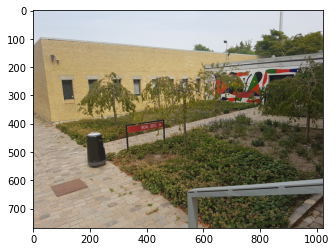

In [2]:
# 1.10
im = cv2.imread('data/DTUsigns001.jpg')
plt.imshow(im[:,:,::-1])

In [4]:
# 1.11
def box3d(n=16): 
    points = [] 
    N = tuple(np.linspace(-1, 1, n)) 
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]: 
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2

In [61]:
# 1.12
def Pi(p:np.ndarray) -> np.ndarray:
    """convert from homogeneous coordinates to inhomogeneous coordinates
    subtract one coordinate"""
    return p[:-1]/p[-1] 

def PiInv(p:np.ndarray) -> np.ndarray:
    """convert from inhomogeneous coordinates to homogeneous coordinates
    add one coordinate with value"""
    return np.vstack((p, np.ones(p.shape[1])))

In [85]:
# 1.13
def projectpoints(K, R, t, Q):
    """project 3D points to 2D"""
    Rt = np.concatenate((R, t), axis=1)
    return Pi(K @ Rt @ PiInv(Q))

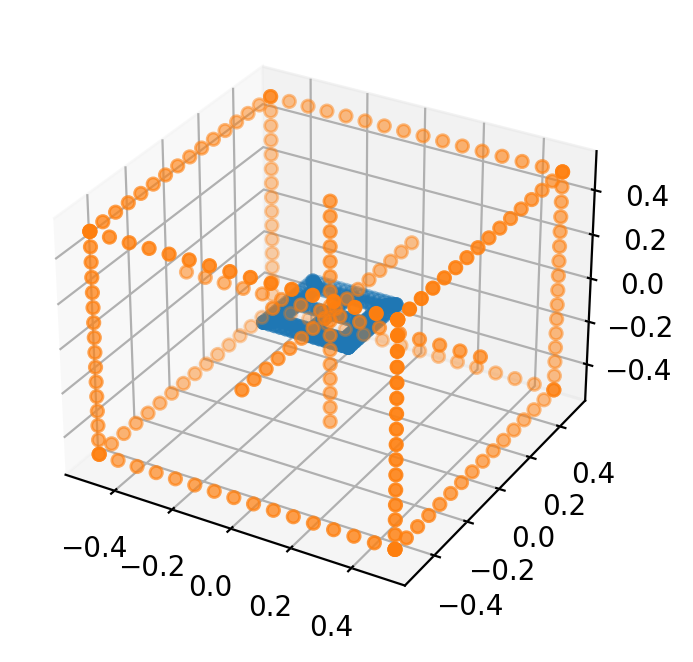

In [124]:
Q = box3d()
K = R = np.eye(3)
t = np.array([[0, 0, 4]]).T
q = projectpoints(K, R, t, Q)
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.scatter(q[0,:], q[1,:]);
ax.scatter(box3d()[0], box3d()[1],box3d()[2]);

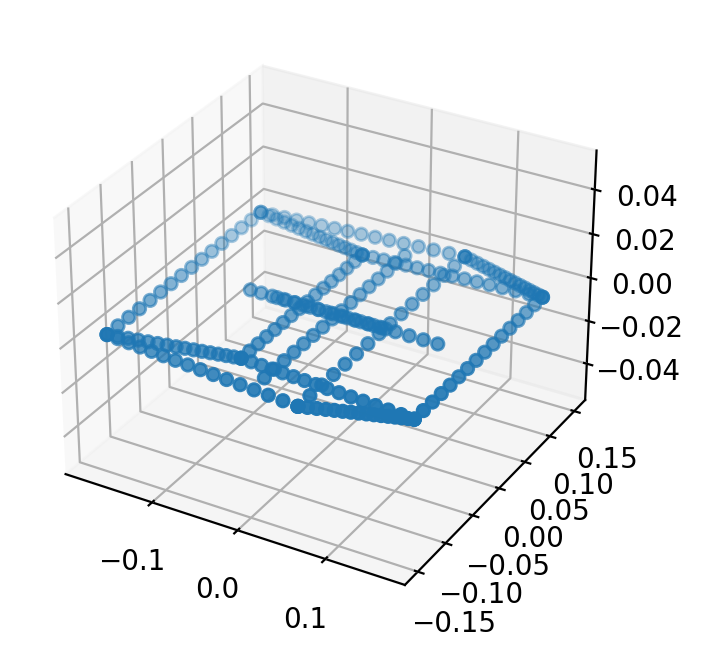

In [125]:
# 1.14
Q = box3d()
K = np.eye(3)
theta = np.pi/6 # 30 degrees
R = np.array([[np.cos(theta), 0, np.sin(theta)],
              [0, 1, 0],
              [-np.sin(theta), 0, np.cos(theta)]])
t = np.array([[0, 0, 4]]).T
q = projectpoints(K, R, t, Q)
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.scatter(q[0,:], q[1,:]);

Det giver nok mere mening at vise som et projiceret 2D billede

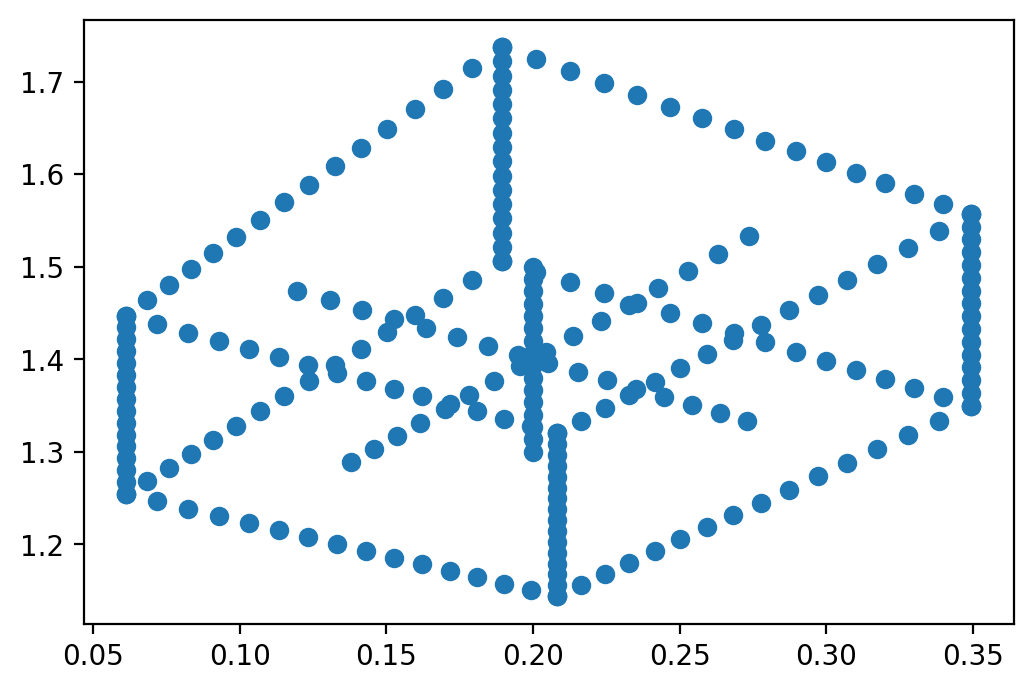

In [135]:
# 1.15
Q = box3d()
K = np.eye(3)
theta = np.pi/3
R = np.array([[np.cos(theta), 0, np.sin(theta)],
              [0, 1, 0],
              [-np.sin(theta), 0, np.cos(theta)]])
t = np.array([[1, 7, 5]]).T
q = projectpoints(K, R, t, Q)
fig = plt.figure(dpi=200)
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
ax.scatter(q[0,:], q[1,:]);

- t[0] lader til at være sidelæns bevægelse,
- t[1] er op ved
- t[2] er frem og tilbage (zoom) 
- $\theta$ roterer om z-aksen

In [136]:
np.pi**2

9.869604401089358